In [6]:
import csv
import numpy as np
from matplotlib import pyplot
from pylab import rcParams
from sklearn import linear_model
from sklearn.model_selection import cross_validate
import pandas as pd
import datetime as dt
import math
import sys
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read a file
#インデックスをTIMESTANPに設定し，時系列データとして読み込む(index_col='TIMESTAMP', parse_dates=True)
df01 = pd.read_csv('logger1_2018-03-13_2018-12-16_every30min_withRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df02 = pd.read_csv('logger2_2018-03-13_2018-12-16_every30min_withRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)
df03 = pd.read_csv('logger3_2018-03-20_2018-12-16_every30min_withRainfall_WL_Velocity.csv', index_col='TIMESTAMP', parse_dates=True)

# print(df01,df02,df03)

In [3]:
df_all_0 = pd.concat([df01, df02, df03], axis=1,sort=False)

#NaNデータを削除
df_all_1 = df_all_0.dropna(how='any')

#df_all_1.columnsを全部表示させるようにする
pd.options.display.max_seq_items = 200

print(df_all_1.columns)


#重複した列を削除(WLなど)
df_all_2 = df_all_1.loc[:,~df_all_1.columns.duplicated()]
# df_all_1.drop_duplicates()

print(df_all_2.columns)

#pd.options.display.max_seq_itemsを元にもどす(初期値が２０だった)
pd.options.display.max_seq_items = 20

Index(['Unnamed: 0', 'RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg',
       'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Rainfall',
       'Velocity', 'WL', 'Unnamed: 0', 'RECORD', 'Bat_Avg', 'outC_R_Avg',
       'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)', 'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)',
       'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)', 'R_Tot(10)', 'outC_RC_Avg',
       'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)', 'RC_Tot(4)', 'RC_Tot(5)',
       'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)', 'RC_Tot(9)', 'RC_Tot(10)',
       'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)', 'C_Tot(3)', 'C_Tot(4)',
       'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)', 'C_Tot(9)', 'C_Tot(10)',
       'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)', 'LC_Tot(3)', 'LC_Tot(4)',
       'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)', 

In [4]:

#Load_Avgの差分をとる
Load_Avg_difference = pd.DataFrame(df_all_2['Load_Avg'].diff())

#Fill out NaNs with 0.
Load_Avg_difference = Load_Avg_difference.fillna(0)
# print(Load_Avg_difference)

# Load_Avg_difference.columns = 'Load_Avg_difference'
Load_Avg_difference.rename(columns={"Load_Avg":"Load_Avg_difference"}, inplace=True)

#Concatnate df with Load_Avg_difference
df_all_LAD = pd.concat([df_all_2, Load_Avg_difference], axis=1)
# print(df_all_LAD)

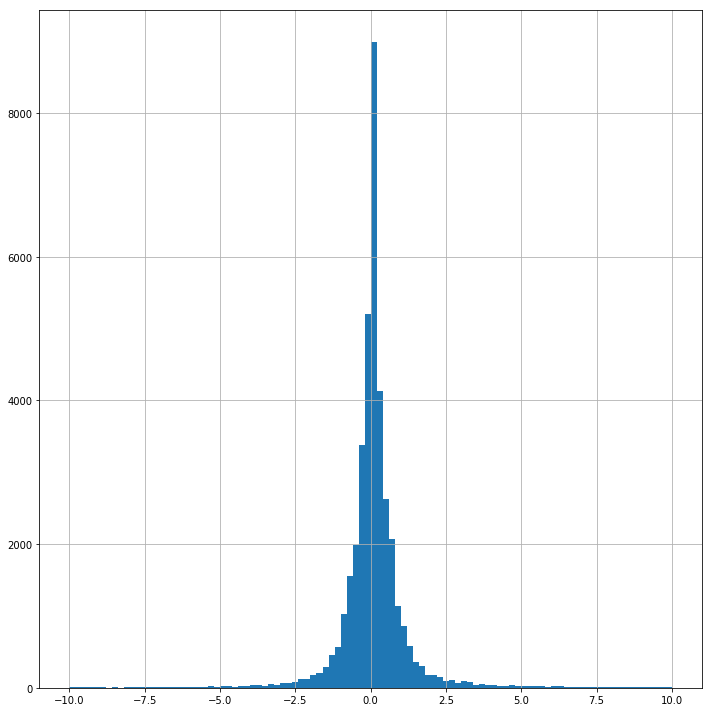

In [7]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_all_LAD['Load_Avg_difference'].hist(bins=100,range=(-10,10))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [1]:
# print(df_all_LAD.dtypes)


In [20]:
#4/28日にピット掃除をしていそうだったのでデータを全部削除しました
sidx='2018-04-28 0:00'
eidx='2018-04-29 0:00'
drop_date_range = pd.date_range(sidx, eidx, freq='10T')
df_all_LAD_cut1 = df_all_LAD.drop(drop_date_range)

#ピット差分が１０以上で、水平ハイドロフォンの６４倍が０のデータは全て消しました。
df_all_LAD_cut2 = df_all_LAD_cut1[~((df_all_LAD['Load_Avg_difference'] >= 10)&(df_all_LAD['hp_Tot(6)'] == 0))]


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [21]:
print(len(df_all_LAD_cut2[df_all_LAD_cut2['Load_Avg_difference'] > 20]))
print(df_all_LAD_cut2['hp_Tot(6)'][df_all_LAD_cut2['Load_Avg_difference'] > 20])
print(df_all_LAD_cut2['Load_Avg'][df_all_LAD_cut2['Load_Avg_difference'] > 20])

40
TIMESTAMP
2018-03-26 13:30:00      0.2
2018-03-26 13:40:00      1.1
2018-04-15 06:30:00     73.2
2018-04-15 11:10:00    187.6
2018-04-15 11:20:00    169.8
2018-04-15 11:30:00    102.8
2018-04-18 12:50:00      0.4
2018-04-18 13:00:00      0.4
2018-04-25 07:20:00     66.4
2018-04-25 07:30:00     53.2
2018-05-31 11:30:00      0.9
2018-06-28 09:40:00    119.9
2018-06-28 09:50:00    135.1
2018-06-28 10:00:00    133.0
2018-06-28 10:10:00    245.3
2018-06-28 10:20:00    194.1
2018-06-28 10:30:00    154.3
2018-06-28 11:00:00     94.9
2018-06-28 11:40:00    332.5
2018-06-28 11:50:00    217.5
2018-06-28 12:10:00    323.9
2018-07-04 21:30:00    156.5
2018-07-04 21:50:00    286.2
2018-07-04 22:00:00    245.9
2018-07-05 23:20:00    276.3
2018-07-09 10:00:00      0.6
2018-07-16 11:00:00      0.2
2018-09-04 17:20:00     30.1
2018-09-04 17:50:00     19.3
2018-09-07 08:20:00      0.1
2018-09-07 08:30:00      0.5
2018-09-08 14:10:00     52.8
2018-09-08 14:50:00     25.3
2018-09-08 15:30:00     23.7
2

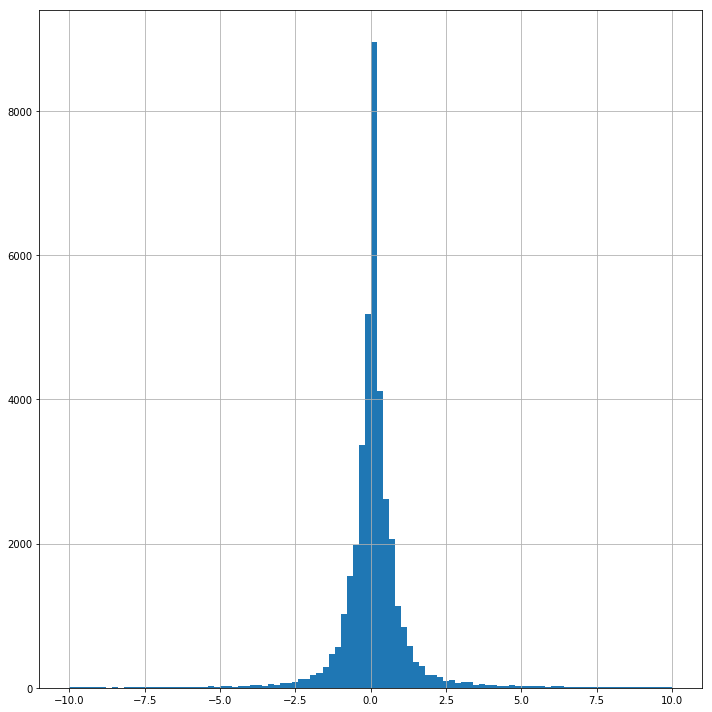

In [22]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_all_LAD_cut2['Load_Avg_difference'].hist(bins=100,range=(-10,10))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [23]:
df_mean_30 = df_all_LAD.asfreq('30T')
# print(df_fin)

# mavgs = 3
# temp_X_cols = df1[X_cols].rolling(window=mavgs).mean()
# temp_y_cols = df1[y_cols].rolling(window=mavgs).mean()


# df1.dropna(how='any')


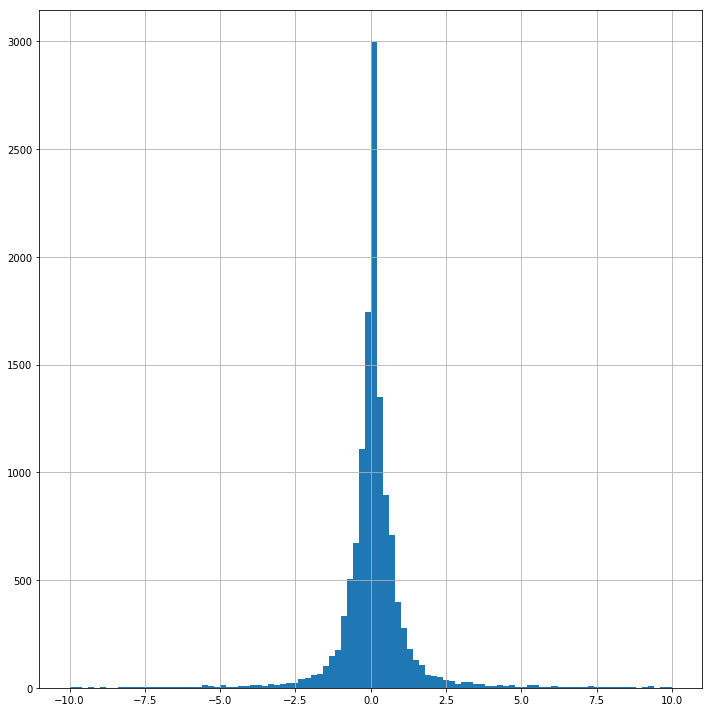

In [24]:
# グラフが見きれないようにするためサイズを大きくしておく
rcParams['figure.figsize'] = 10, 10
# ヒストグラムを描画する(一括の時は単純にdf.hist())
df_mean_30['Load_Avg_difference'].hist(bins=100,range=(-10,10))
# グラフ同士が重ならないようにする関数
plt.tight_layout()
# グラフの表示
plt.show()

In [15]:
# moving averages
#Setting a rate of moving averages
mavgs = 3
df_movingav_30 = df_all_LAD.rolling(mavgs).mean()
# print(df_movingav_30)
# NaNデータを削除
df1_movingav_30 = df_movingav_30.dropna(how='any')
# print(df1_movingav_30)

In [15]:
# df_fin = df_movingav_30
df_fin = df_mean_30

In [16]:
pd.options.display.max_seq_items = 200

print(df_fin.columns)

pd.options.display.max_seq_items = 20

Index(['Unnamed: 0', 'RECORD', 'Bat_Avg', 'Pit_WL_Avg', 'L_UR_Avg', 'L_UL_Avg',
       'L_DR_Avg', 'L_DL_Avg', 'Load_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Rainfall',
       'Velocity', 'WL', 'outC_R_Avg', 'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)',
       'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)', 'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)',
       'R_Tot(10)', 'outC_RC_Avg', 'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)',
       'RC_Tot(4)', 'RC_Tot(5)', 'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)',
       'RC_Tot(9)', 'RC_Tot(10)', 'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)',
       'C_Tot(3)', 'C_Tot(4)', 'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)',
       'C_Tot(9)', 'C_Tot(10)', 'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)',
       'LC_Tot(3)', 'LC_Tot(4)', 'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)',
       'LC_Tot(8)', 'LC_Tot(9)', 'LC_Tot(1

In [17]:
#Choose data we are gonna use
#YOU SHOULD CHANGE HERE IF YOU WANNA SELECT DIFFERENT INPUT DATA OR ADD SOME DATA AS INPUTS
# y_cols = ['Load_Avg_difference']
y_cols = ['Load_Avg_difference']

#ALL
X_cols = ['Bat_Avg', 'WL_FMR_Avg', 'vel_P_Tot',
       'turb1000_Avg', 'turb4000_Avg', 'DiffVolt_Avg', 'hp_Tot(1)',
       'hp_Tot(2)', 'hp_Tot(3)', 'hp_Tot(4)', 'hp_Tot(5)', 'hp_Tot(6)',
       'hp_Tot(7)', 'hp_Tot(8)', 'hp_Tot(9)', 'hp_Tot(10)', 'Rainfall',
       'Velocity', 'WL', 'outC_R_Avg', 'R_Tot(1)', 'R_Tot(2)', 'R_Tot(3)',
       'R_Tot(4)', 'R_Tot(5)', 'R_Tot(6)', 'R_Tot(7)', 'R_Tot(8)', 'R_Tot(9)',
       'R_Tot(10)', 'outC_RC_Avg', 'RC_Tot(1)', 'RC_Tot(2)', 'RC_Tot(3)',
       'RC_Tot(4)', 'RC_Tot(5)', 'RC_Tot(6)', 'RC_Tot(7)', 'RC_Tot(8)',
       'RC_Tot(9)', 'RC_Tot(10)', 'outC_C_Avg', 'C_Tot(1)', 'C_Tot(2)',
       'C_Tot(3)', 'C_Tot(4)', 'C_Tot(5)', 'C_Tot(6)', 'C_Tot(7)', 'C_Tot(8)',
       'C_Tot(9)', 'C_Tot(10)', 'outC_LC_Avg', 'LC_Tot(1)', 'LC_Tot(2)',
       'LC_Tot(3)', 'LC_Tot(4)', 'LC_Tot(5)', 'LC_Tot(6)', 'LC_Tot(7)',
       'LC_Tot(8)', 'LC_Tot(9)', 'LC_Tot(10)', 'outC_L_Avg', 'L_Tot(1)',
       'L_Tot(2)', 'L_Tot(3)', 'L_Tot(4)', 'L_Tot(5)', 'L_Tot(6)', 'L_Tot(7)',
       'L_Tot(8)', 'L_Tot(9)', 'L_Tot(10)', 'outC_VR_Avg', 'VR_Tot(1)',
       'VR_Tot(2)', 'VR_Tot(3)', 'VR_Tot(4)', 'VR_Tot(5)', 'VR_Tot(6)',
       'VR_Tot(7)', 'VR_Tot(8)', 'VR_Tot(9)', 'VR_Tot(10)', 'outC_VL_Avg',
       'VL_Tot(1)', 'VL_Tot(2)', 'VL_Tot(3)', 'VL_Tot(4)', 'VL_Tot(5)',
       'VL_Tot(6)', 'VL_Tot(7)', 'VL_Tot(8)', 'VL_Tot(9)', 'VL_Tot(10)',
       'outC_VC_Avg', 'VC_Tot(1)', 'VC_Tot(2)', 'VC_Tot(3)', 'VC_Tot(4)',
       'VC_Tot(5)', 'VC_Tot(6)', 'VC_Tot(7)', 'VC_Tot(8)', 'VC_Tot(9)',
       'VC_Tot(10)', 'outC_T75_Avg', 'T75_Tot(1)', 'T75_Tot(2)', 'T75_Tot(3)',
       'T75_Tot(4)', 'T75_Tot(5)', 'T75_Tot(6)', 'T75_Tot(7)', 'T75_Tot(8)',
       'T75_Tot(9)', 'T75_Tot(10)', 'outC_Plate_Avg', 'Plate_Tot(1)',
       'Plate_Tot(2)', 'Plate_Tot(3)', 'Plate_Tot(4)', 'Plate_Tot(5)',
       'Plate_Tot(6)', 'Plate_Tot(7)', 'Plate_Tot(8)', 'Plate_Tot(9)',
       'Plate_Tot(10)', 'Vib_Avg']

X = df_fin[X_cols]
y = df_fin[y_cols]
# #     X.rolling(window=5).mean()
#     y.rolling(window=5).mean()



In [2]:
# print(X)

In [18]:
#Cut data where pit weigh < 1000?500?
df_fin['Load_Avg'] = df_fin['Load_Avg'].values.astype('float')
df_cut1 = df_fin[(df_fin['Load_Avg'] > 200)&(df_fin['Load_Avg'] < 1300)]

# Cut data where pit load difference is out of margin of error
df_cut2 = df_cut1[(df_cut1['Load_Avg_difference'] < 20)&(df_cut1['Load_Avg_difference'] > -0.5)]

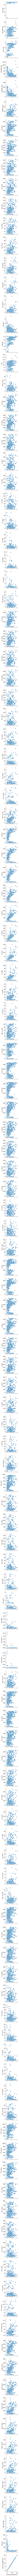

In [19]:
# 「散布図行列」を作成する。散布図行列を利用すれば、データセットの特徴量のペアに対す
# る相関関係を1 つの平面上で可視化可能
import matplotlib.pyplot as plt
import seaborn as sns
Xy_cols = X_cols + y_cols
df_f = df_cut2[Xy_cols].astype('float')
sns.pairplot(df_f[Xy_cols],x_vars=['Load_Avg_difference'], y_vars= Xy_cols, height=2.5)

#グラフを保存するときは描画させない
plt.show()
# plt.savefig('figure(LADandOthers).png')

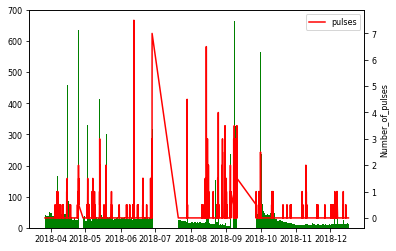

In [25]:
# df_cut3 = df_cut2.set_index('TIMESTAMP')

fig, ax1 = plt.subplots()

#x軸
s=df_cut2.index

#主軸に出来高の棒グラフ
ax1.bar(s,df_cut2['hp_Tot(1)'], color = 'g')

#主軸と2軸の関連づけ
ax2=ax1.twinx()

#第2軸に株価
ax2.plot(s,df_cut2['Rainfall'],'r', label = 'pulses')

# 描画の調整
plt.rcParams['font.size'] = 8
plt.ylabel('Number_of_pulses')
plt.legend()
plt.savefig('compiration_LADandHP(1).png')
plt.show()

In [20]:
X = df_cut2[X_cols].values.astype('float')
y = df_cut2[y_cols].values.astype('float')

In [21]:
#Devide data into Training set and test set
#In Machine Learning course of coursera, I learned that I have to devide the data set into Training set, Cross calidation set,Test set.
#But in this case I'll just follow the code that I found online. Probably I'll have to fix this part once I get to know much more about Machine Learning.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_ori_train = X_train
X_ori_test = X_test
y_ori_train = y_train
y_ori_test = y_test

In [22]:
# train the parameters with regression model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(100)
# n_estimators : integer, optional (default=10)
# The number of trees in the forest.

model.fit(X_train, y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [23]:
#Score
#coefficient of determination R^2 

print(model.score(X_test,y_test))

0.6081731465393043


In [24]:
# #Score without the data where there's no events happning
#Delete data of when the pit gets cleared 

df_y_test = pd.DataFrame(y_test)
df_y_test.columns = y_cols
df_X_test = pd.DataFrame(X_test)
df_X_test.columns = X_cols

df_yX_test = pd.concat([df_y_test, df_X_test], axis=1)

df_yX_test_del = df_yX_test[(df_yX_test['Load_Avg_difference'] < 20)&(df_yX_test['Load_Avg_difference'] > 1)]
X_test_del = df_yX_test_del[X_cols].values.astype('float')
y_test_del = df_yX_test_del[y_cols].values.astype('float')


print("Score ,when y>1")
print(model.score(X_test_del,y_test_del))
print("The number of the data where y > 1 ", "is " ,len(y_test_del))

Score ,when y>1
0.2861769105206188
The number of the data where y > 1  is  515


In [91]:
# y, X should be real data. X is gonna put into the model you made 
# and the model will give you the predictions. 
# This line graph shows how the predicitons match with the real data which is y.
# Second gragh zooms out the part where you chose from sta to end.
class Graph:
    def __init__(self, y, X):
        self.y = y
        self.X = X
        

    def line_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)
        #flatten y_test to applay the data to a graph
        y_graph = self.y.flatten()
        #
        df_result = pd.DataFrame({"y_test":y_graph,"result":result})

        #
        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        # Draw graph
        df_result.plot(figsize=(15, 3))
        
        # Zoom out where you chose
        df_result[sta:end].plot(figsize=(15, 3))
        plt.show()
        
    def cumlate_graph(self, sta = 0, end = len(y)):
        result = model.predict(self.X)

        p_res = np.cumsum(result)
        y_res = np.cumsum(self.y)

        %matplotlib inline
        import matplotlib
        import matplotlib.pyplot as plt

        df_p_x = pd.DataFrame({"original":y_res,"result":p_res})
        df_p_x.plot(figsize=(15, 3))
        df_p_x[sta:end].plot(figsize=(15, 3))
        plt.show()

        
    #Take a look at a distribution map between y and X
    def distribution_map(self, number = 0):
        import matplotlib.pyplot as plt
        # Notebook出力には次の１行が必要
        %matplotlib inline

        # # Plot the data you select
        plt.figure(figsize=(8, 6))

        plt.scatter(self.y, self.X[:,number])
        plt.show()

        
    


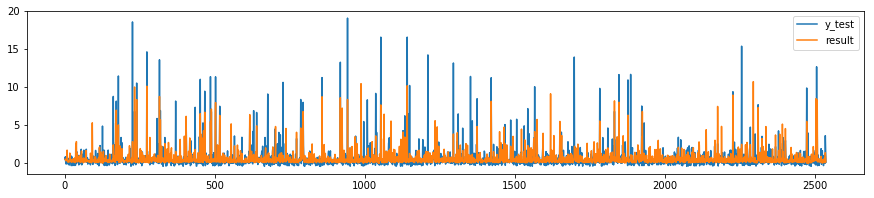

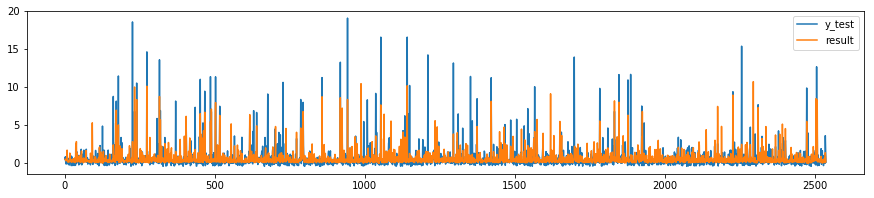

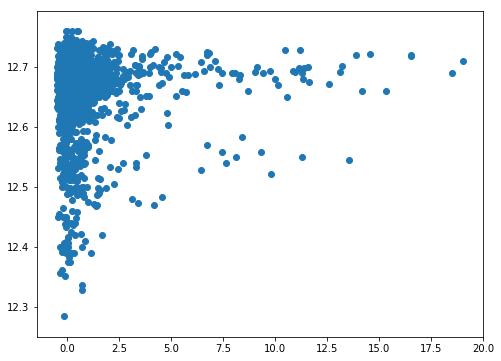

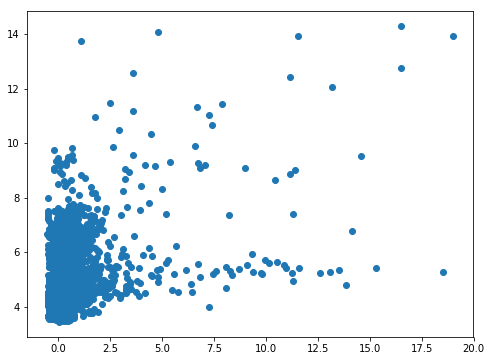

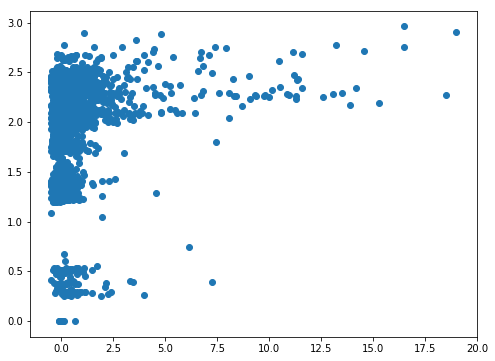

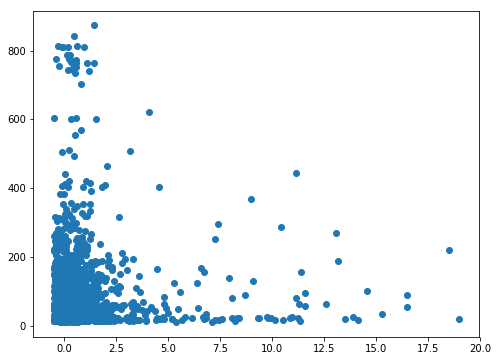

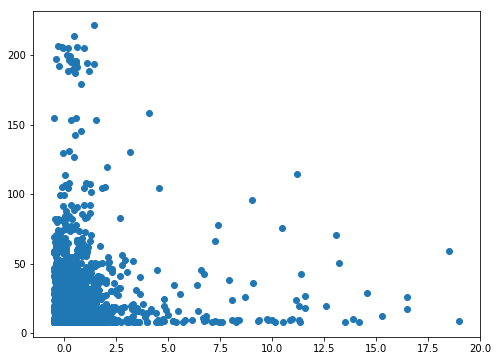

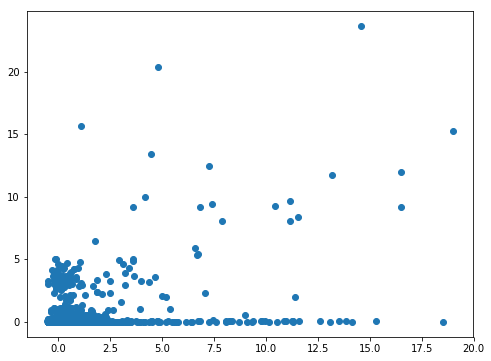

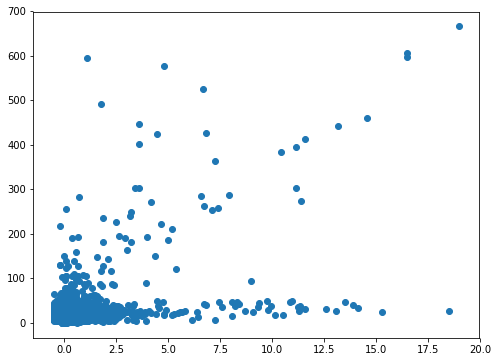

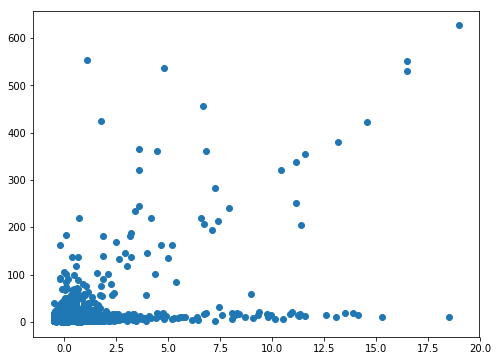

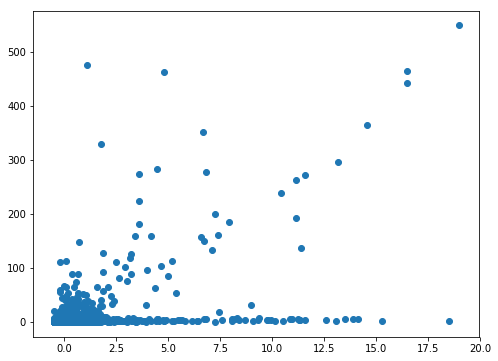

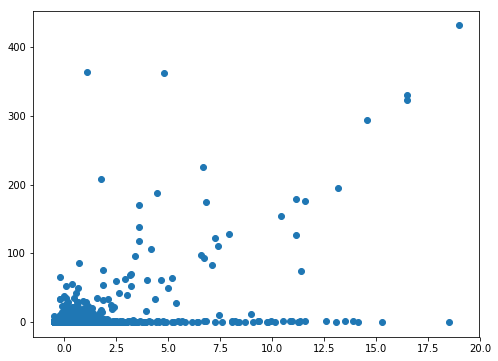

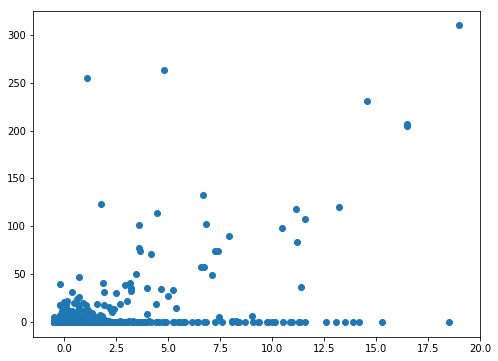

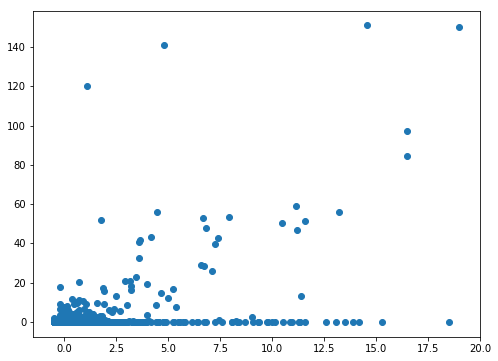

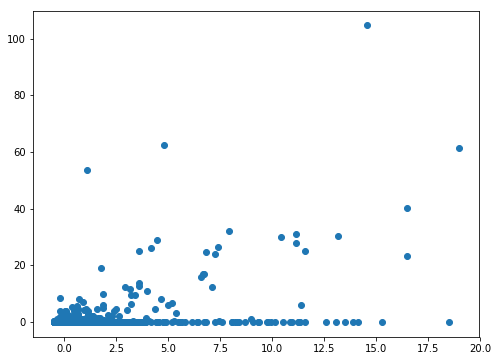

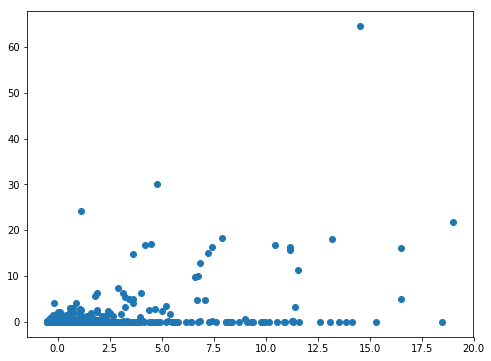

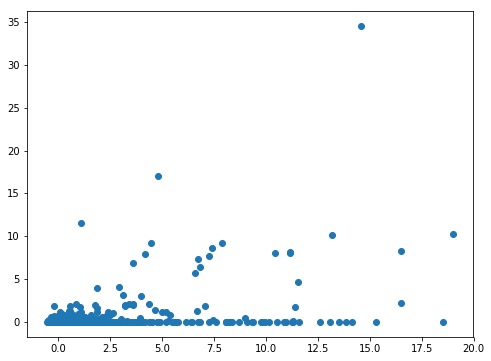

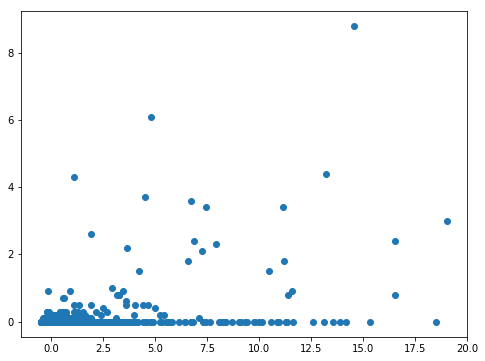

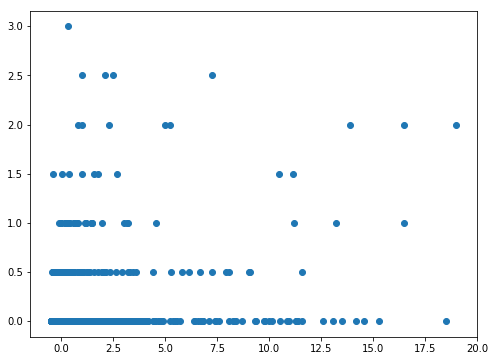

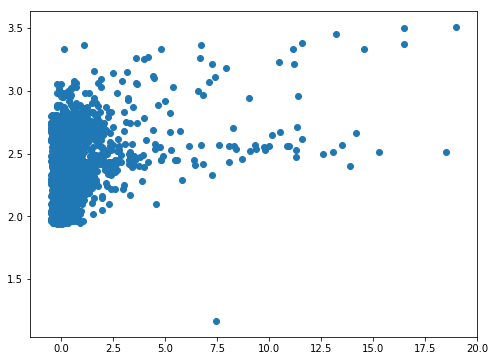

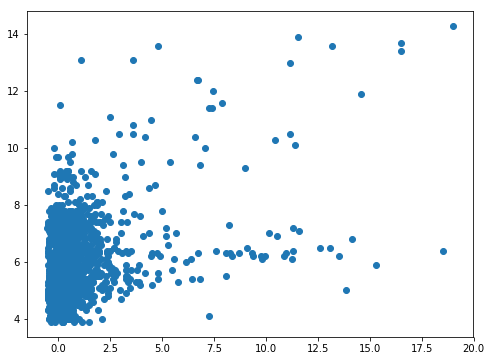

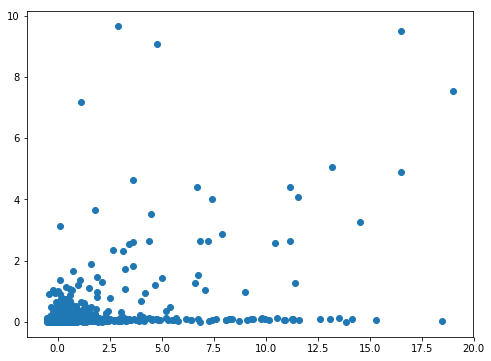

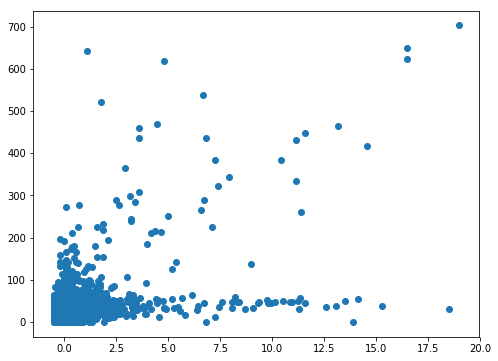

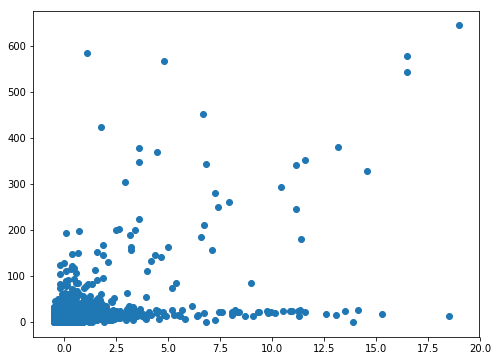

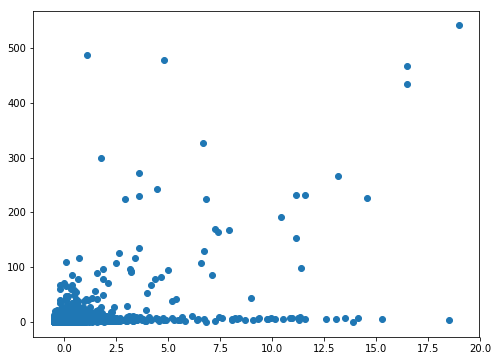

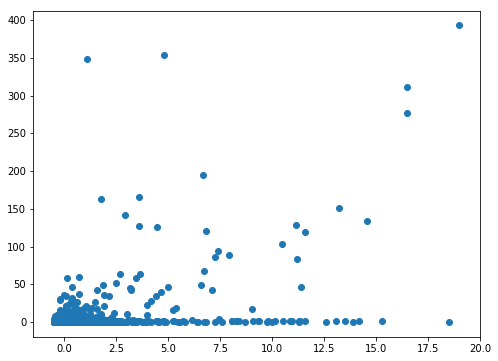

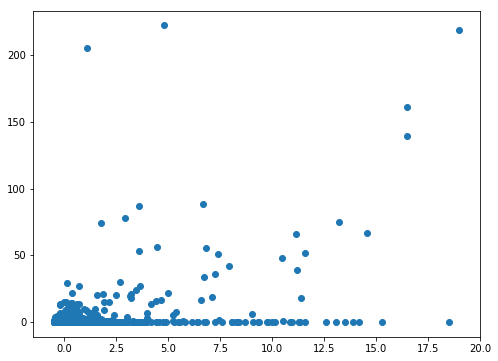

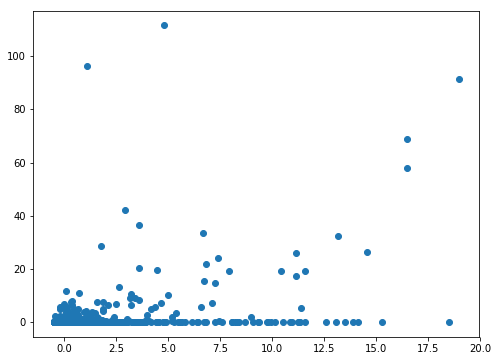

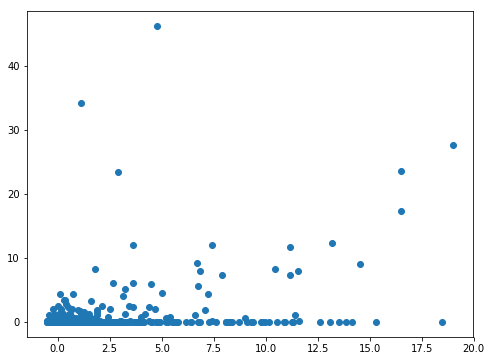

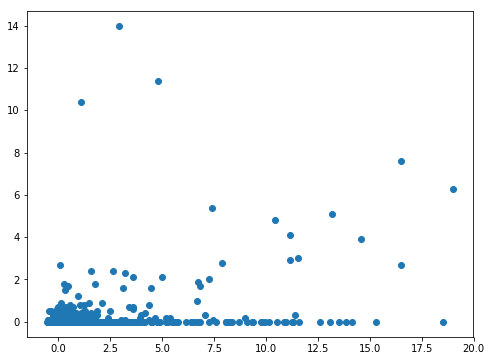

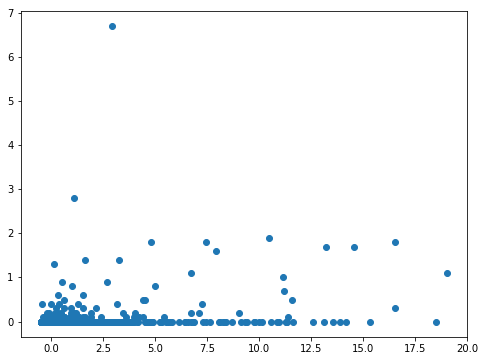

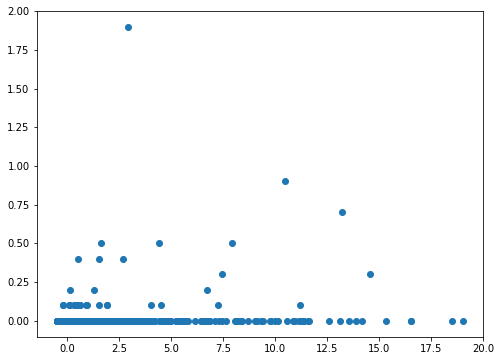

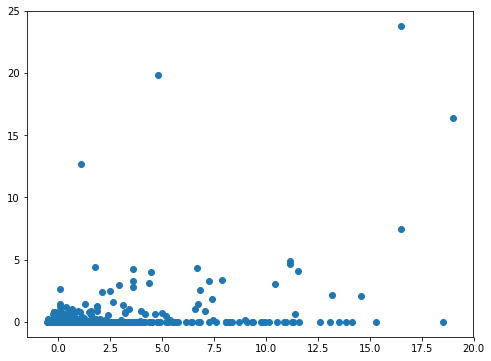

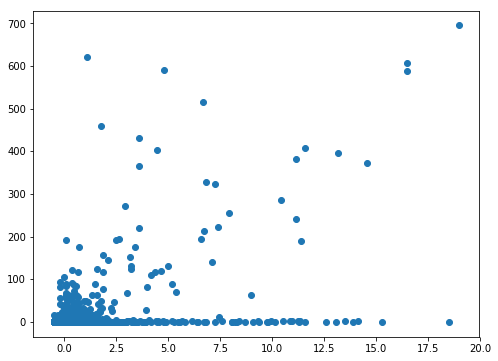

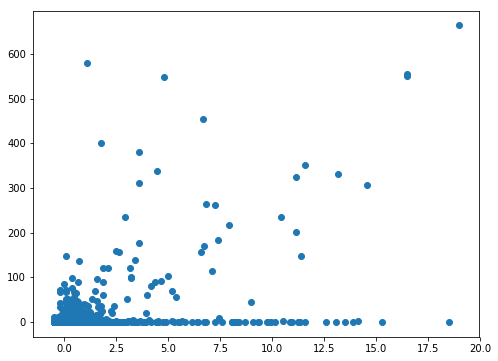

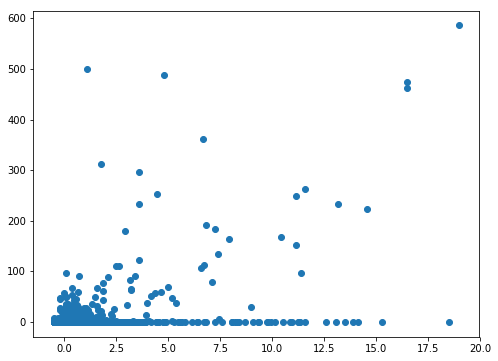

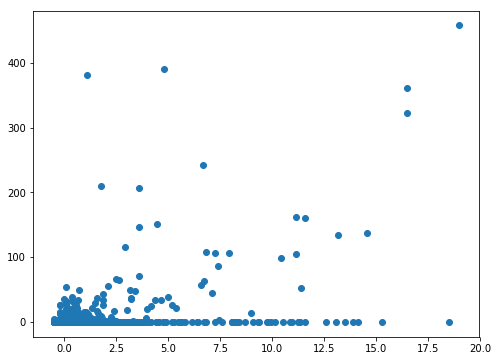

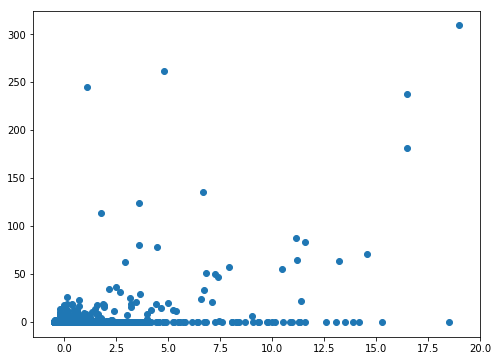

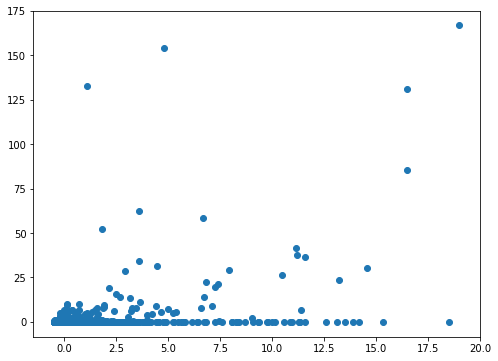

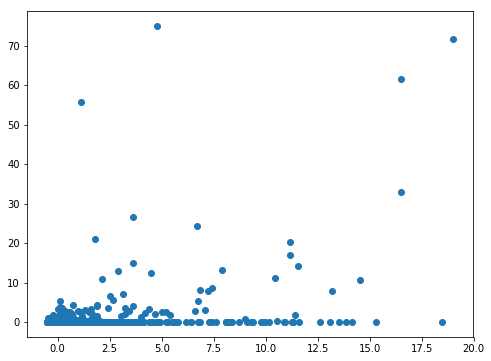

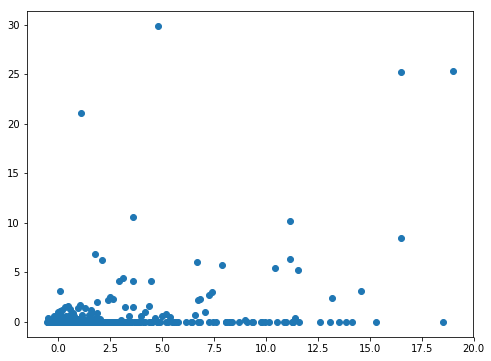

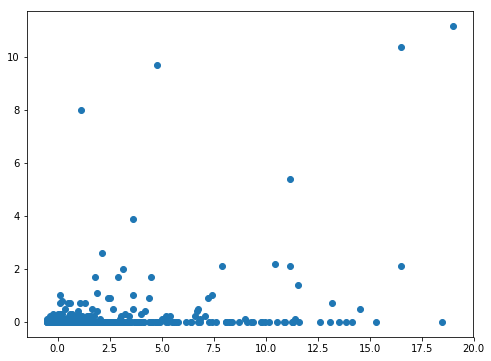

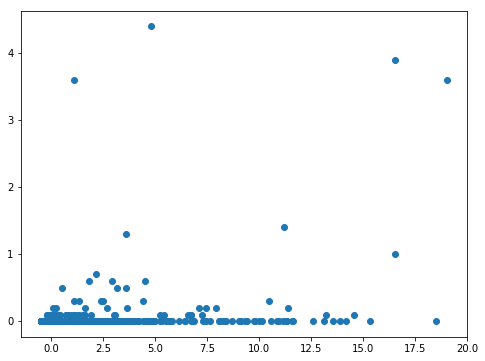

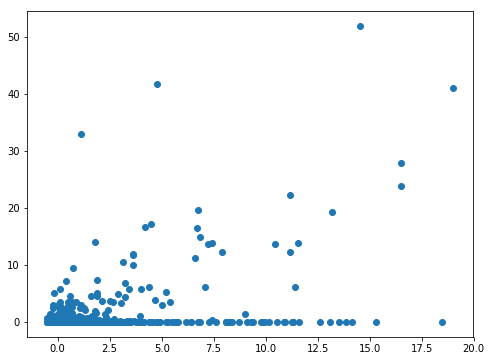

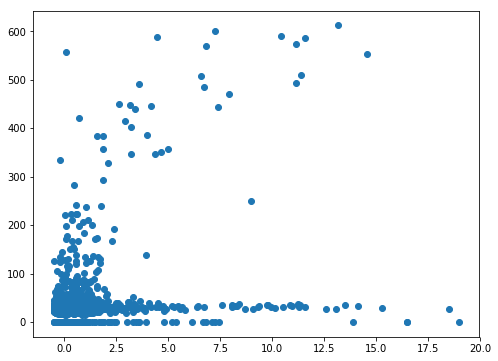

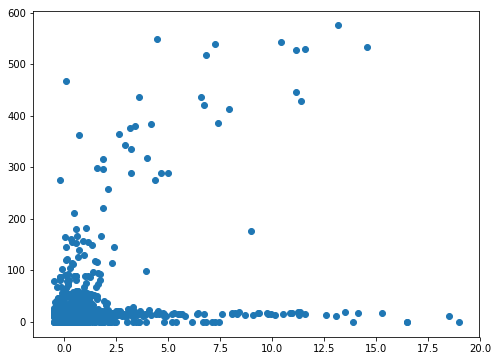

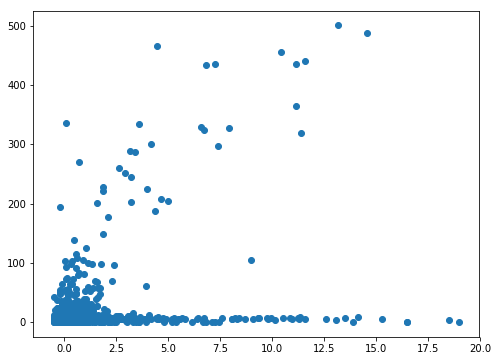

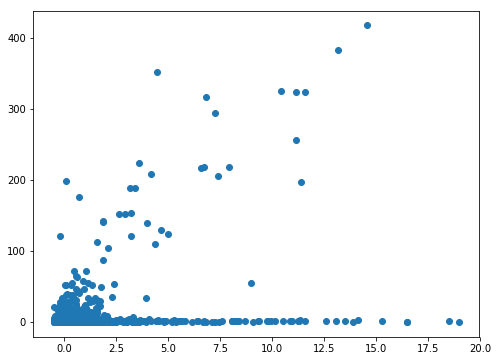

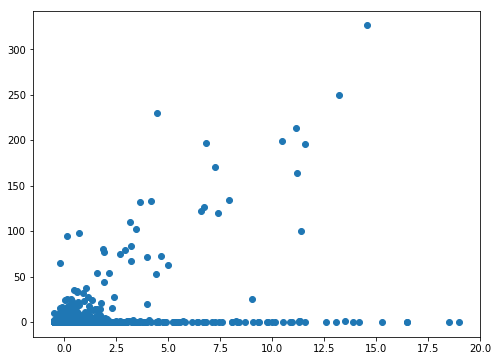

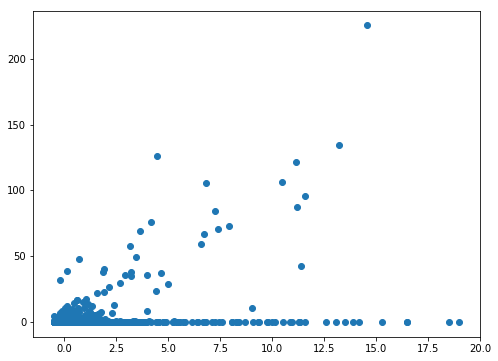

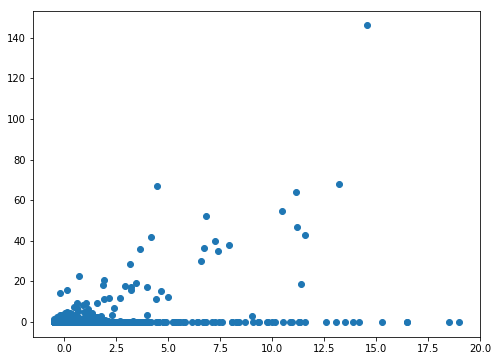

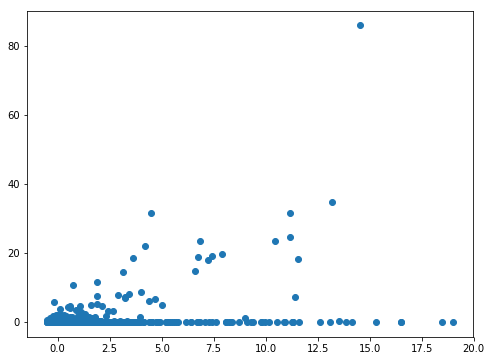

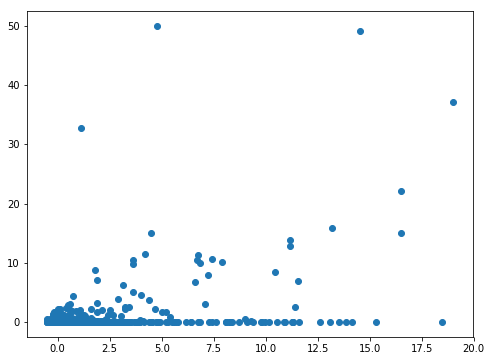

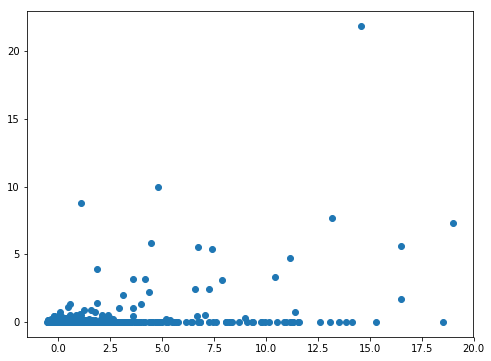

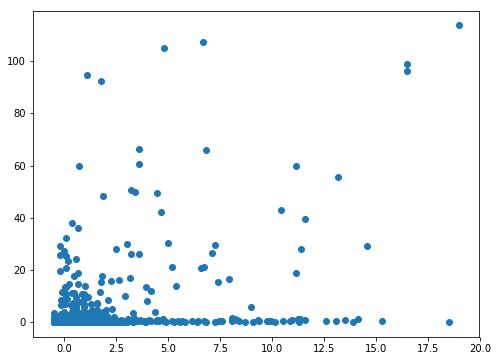

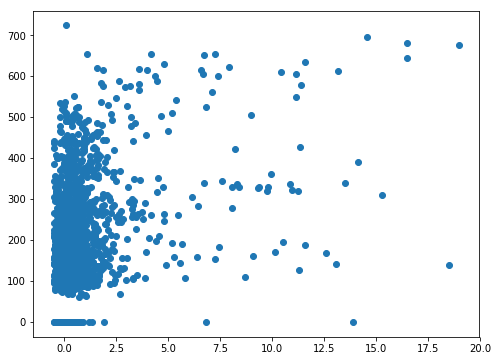

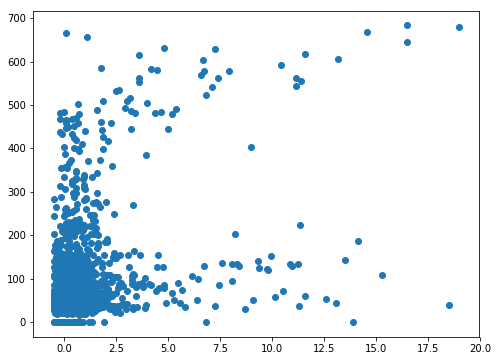

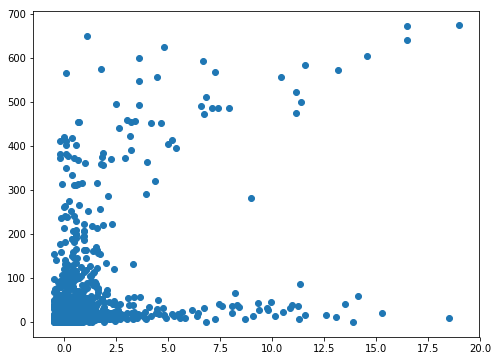

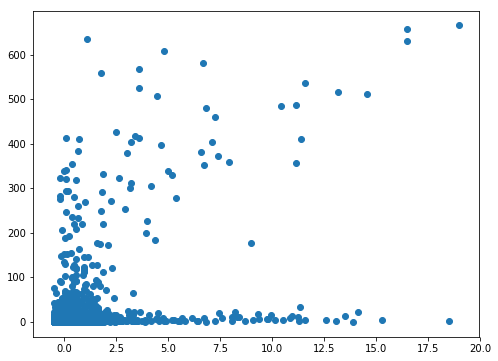

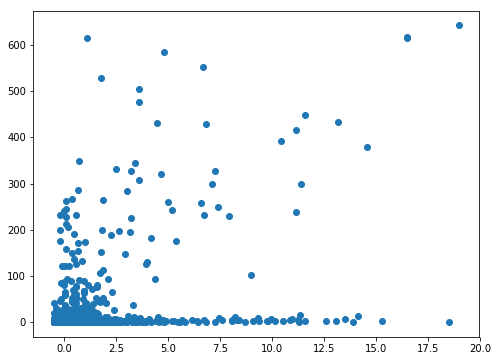

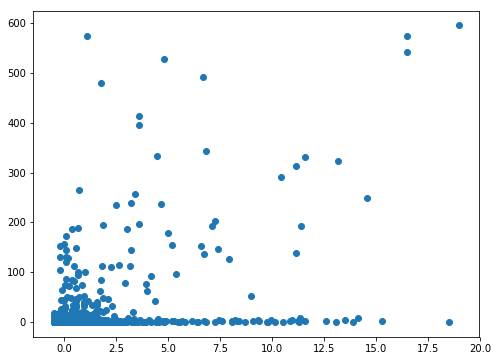

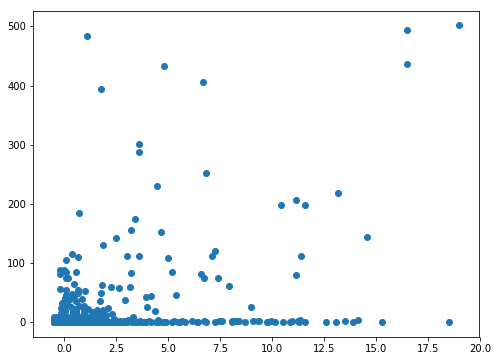

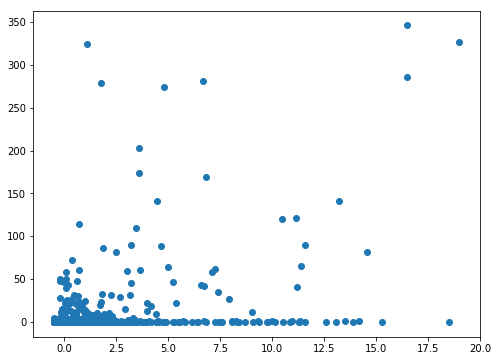

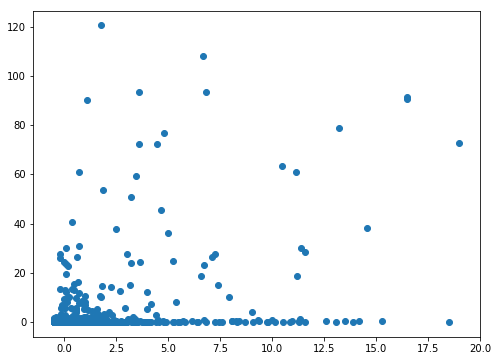

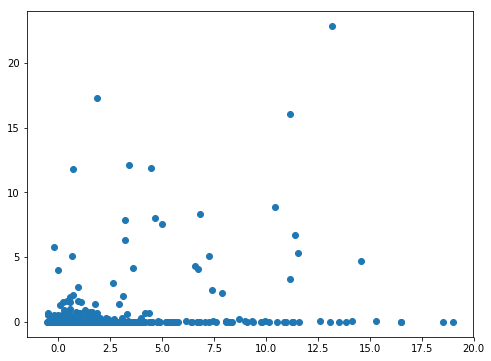

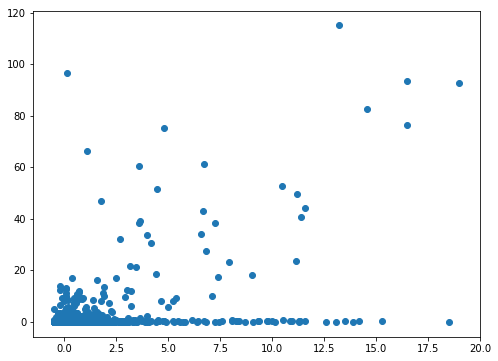

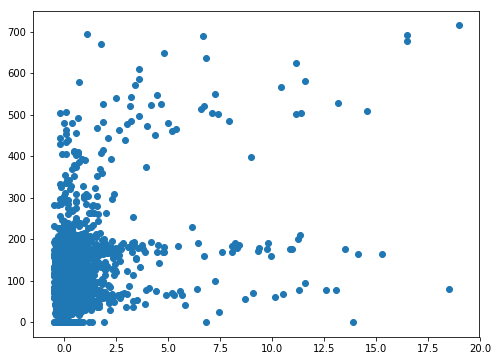

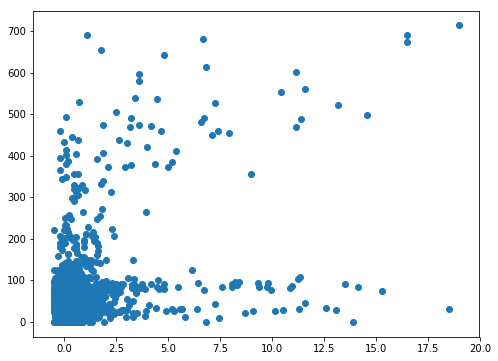

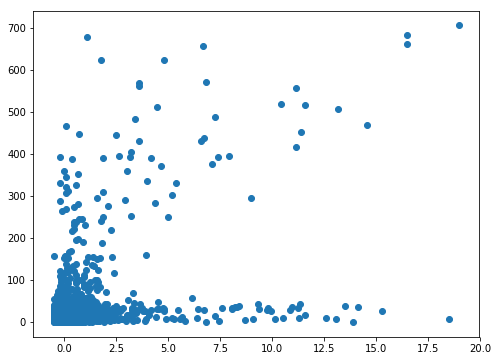

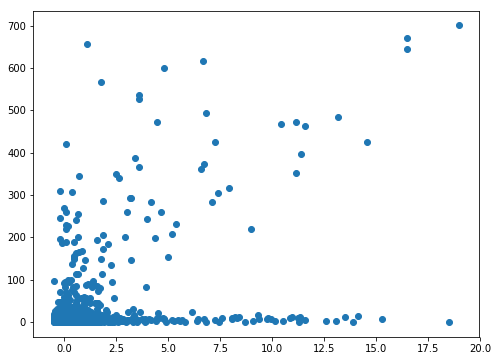

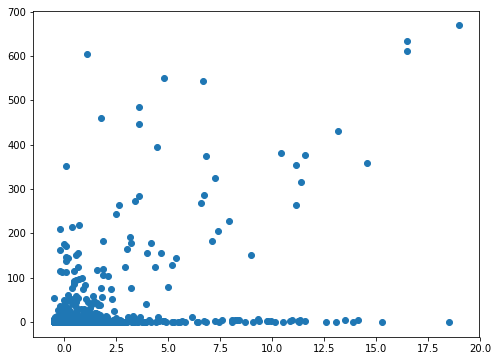

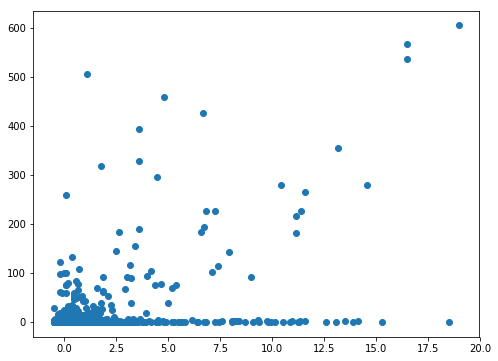

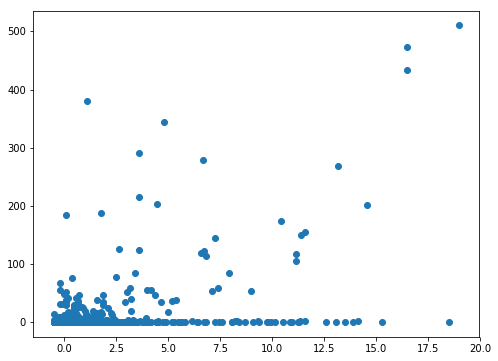

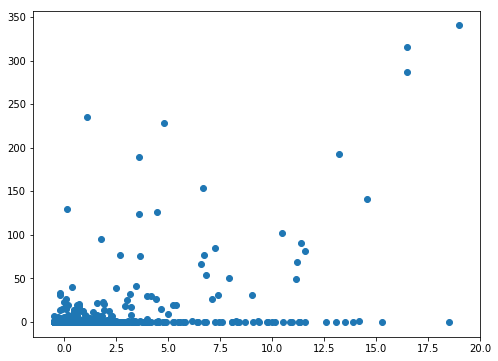

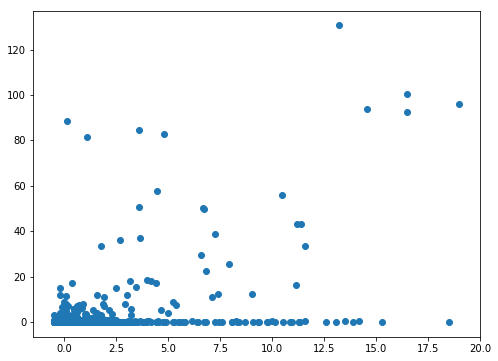

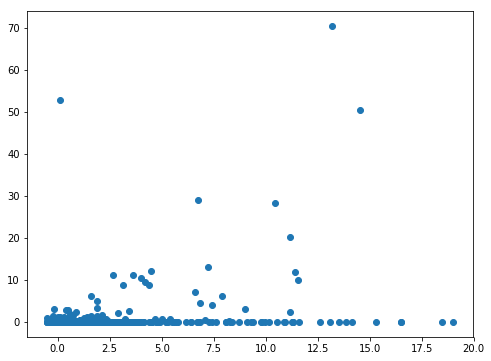

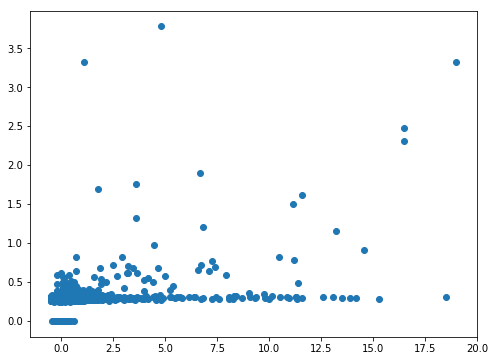

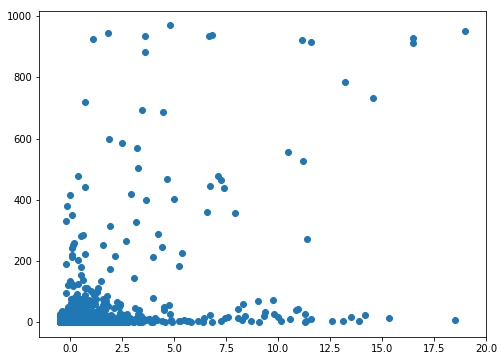

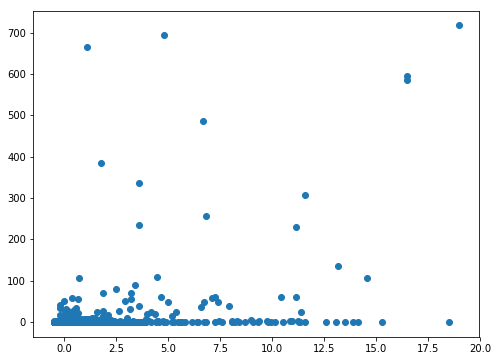

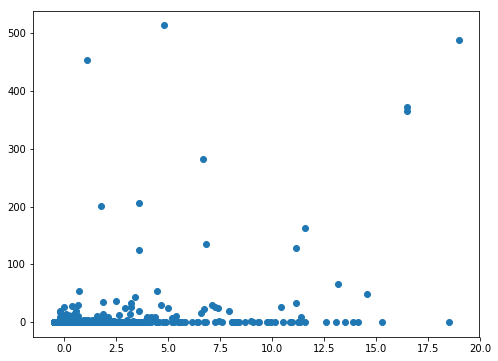

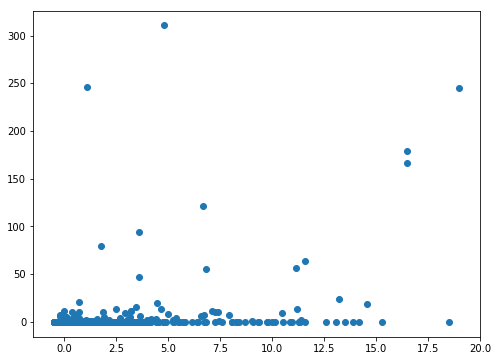

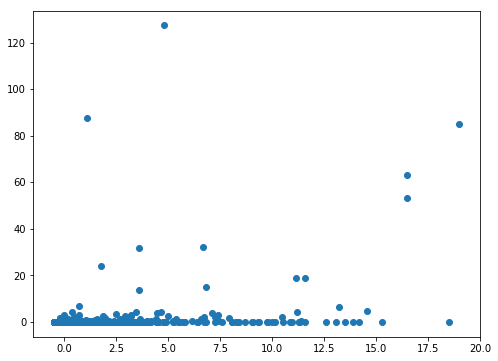

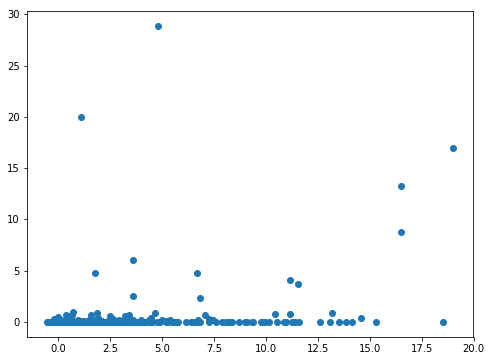

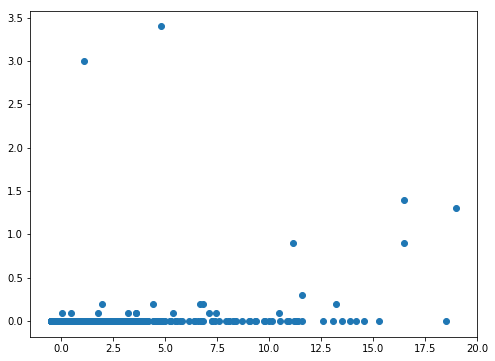

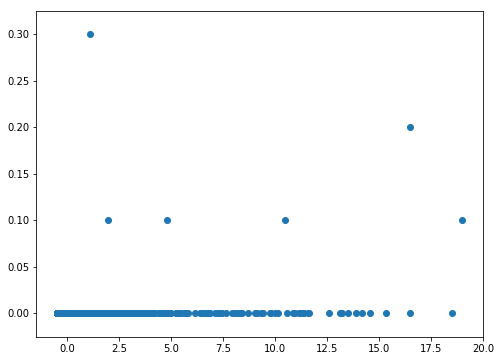

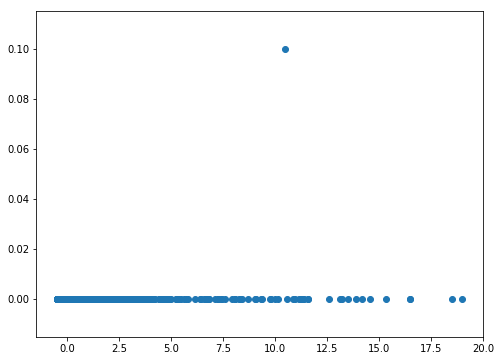

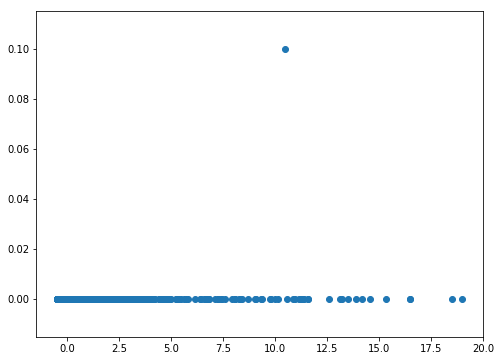

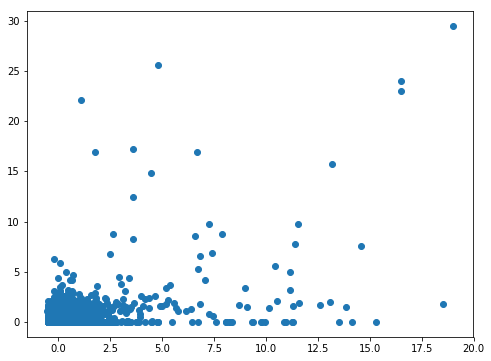

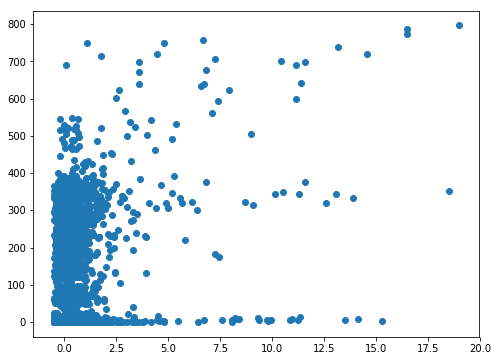

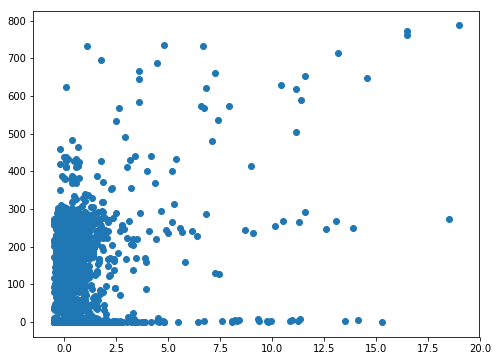

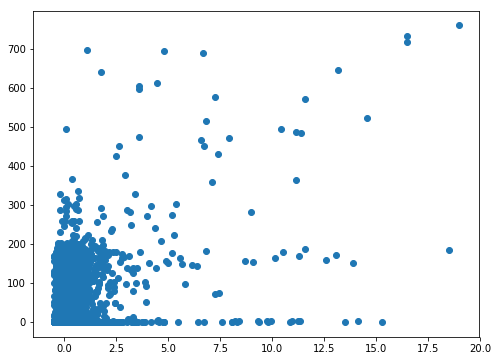

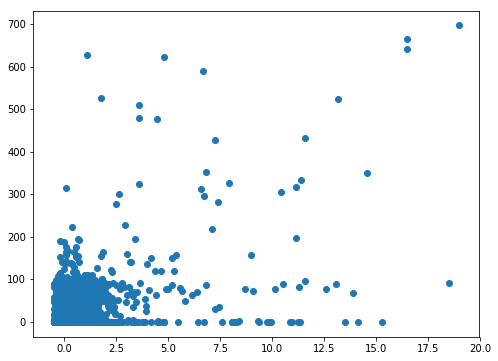

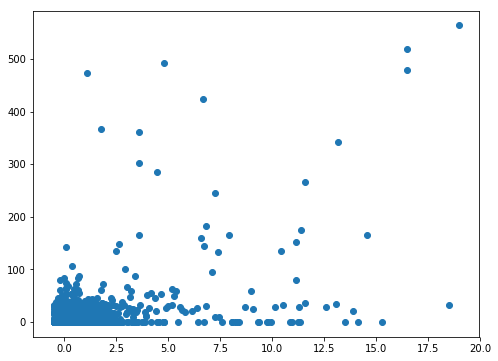

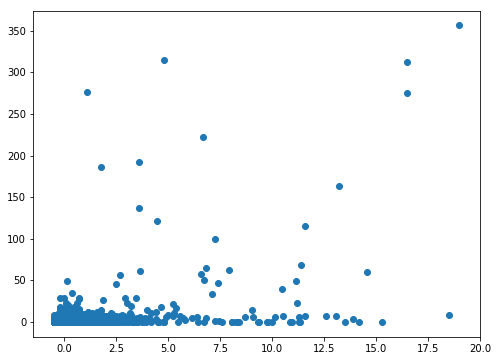

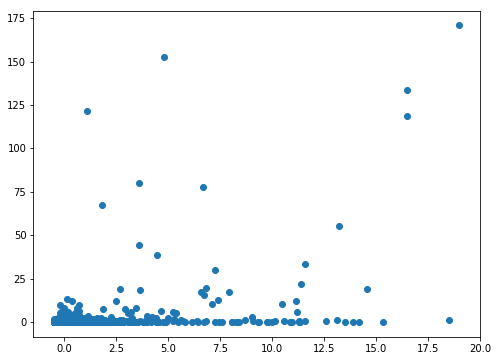

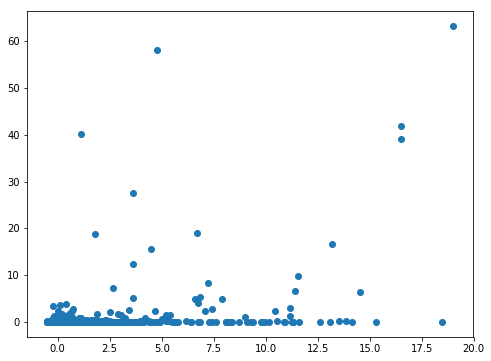

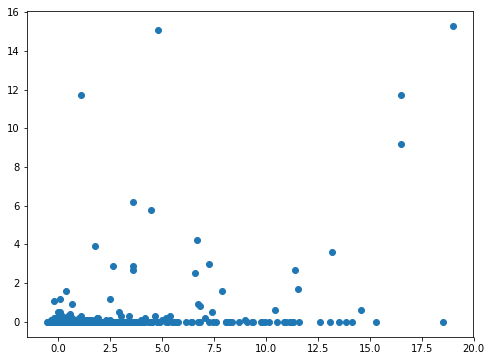

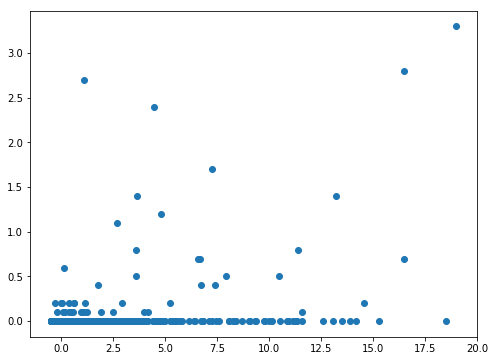

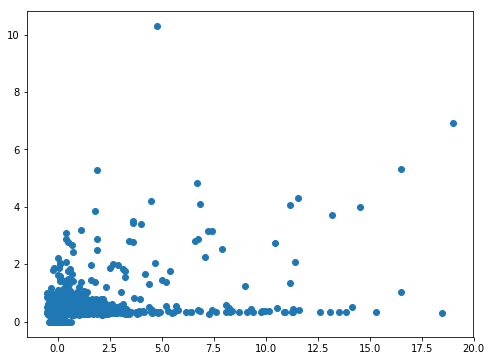

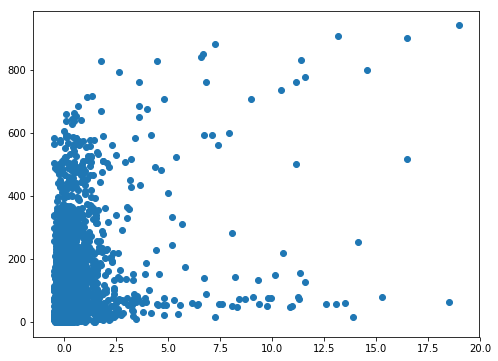

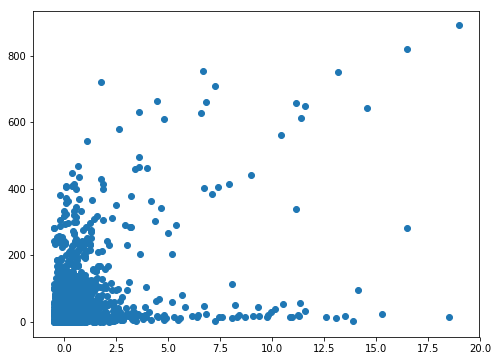

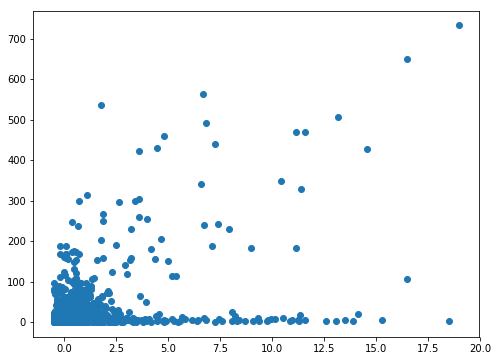

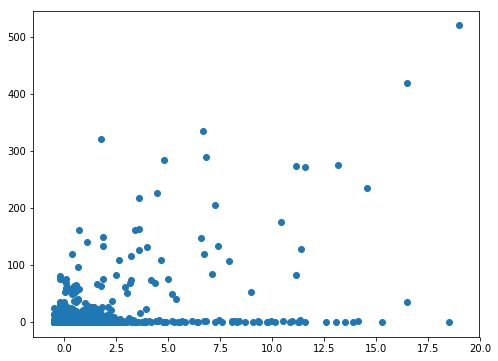

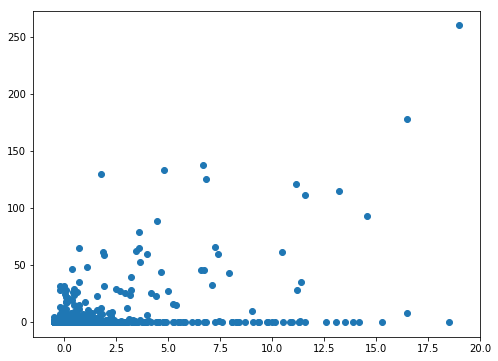

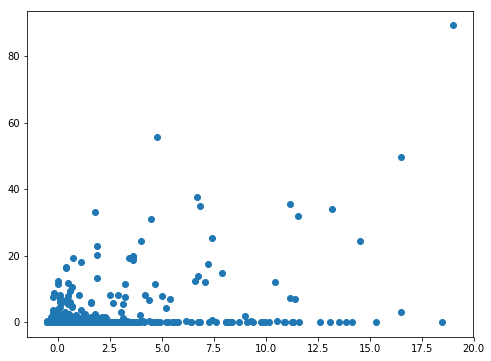

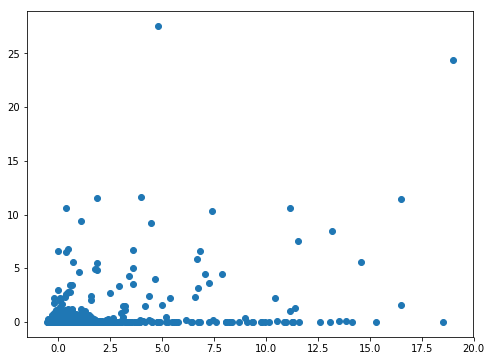

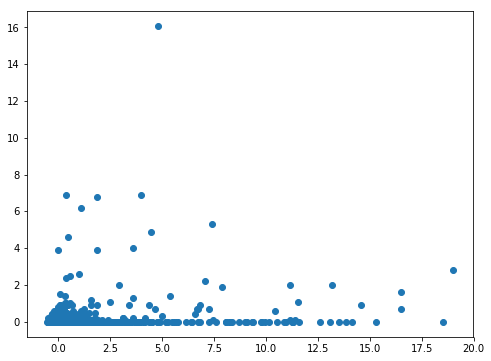

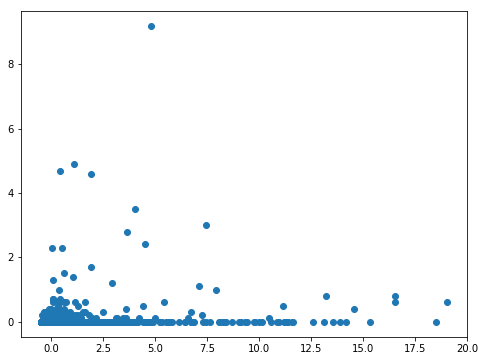

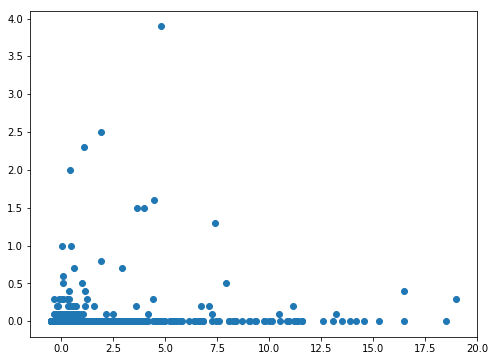

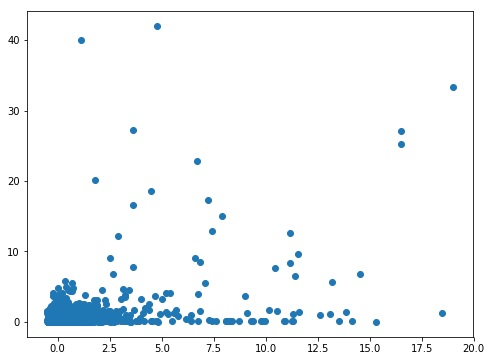

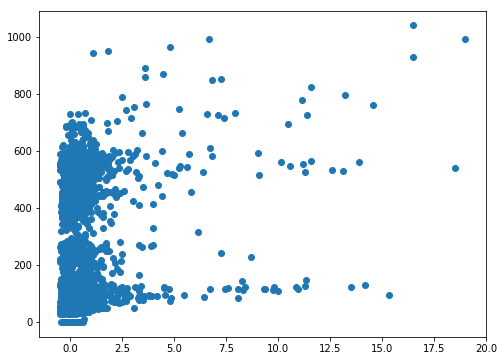

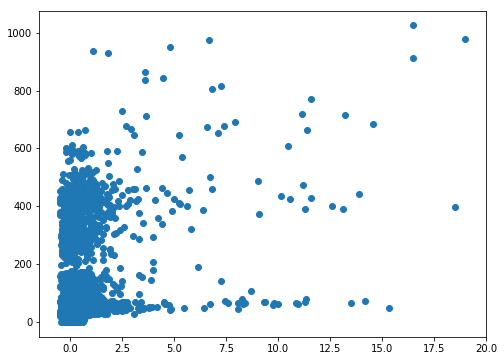

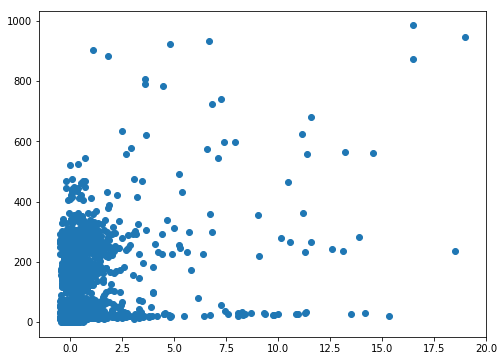

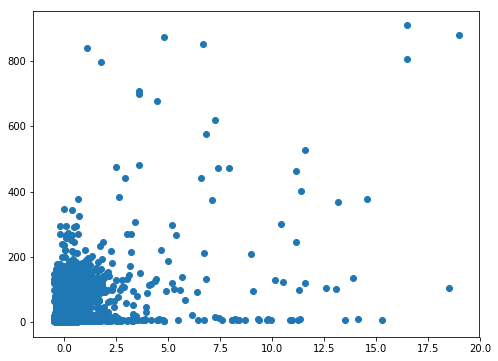

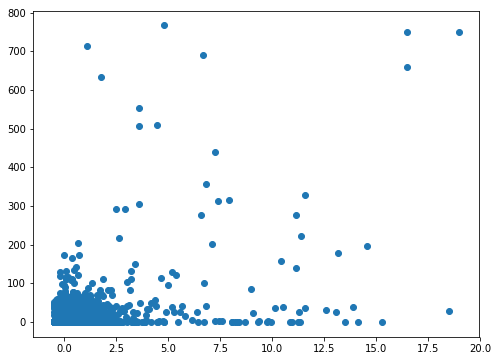

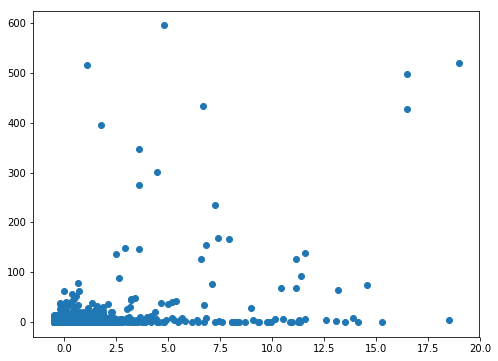

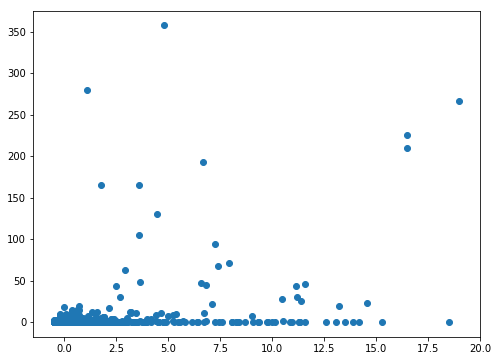

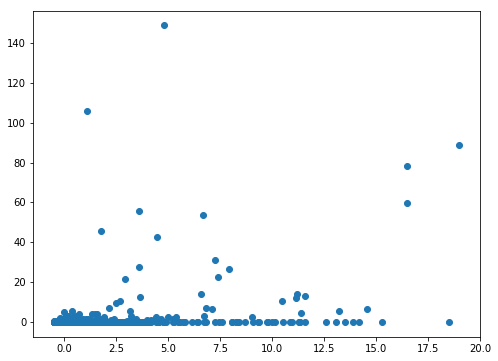

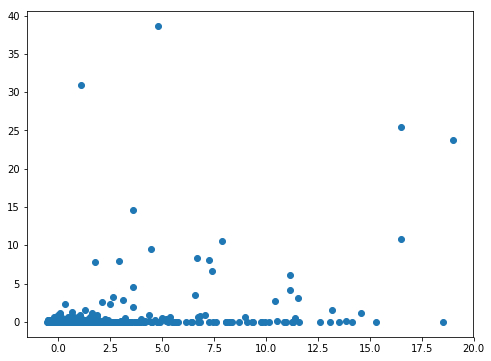

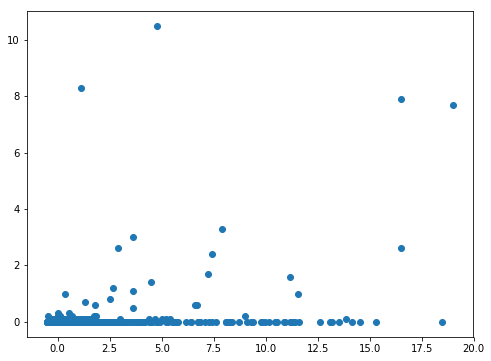

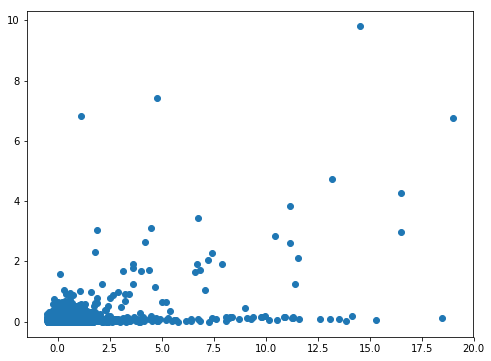

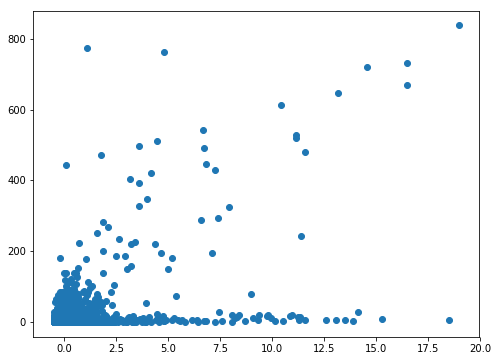

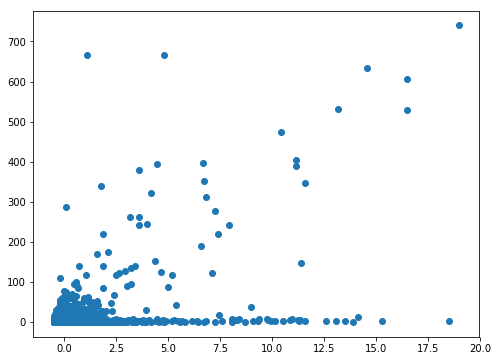

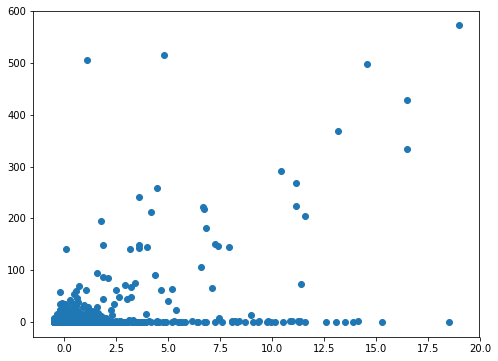

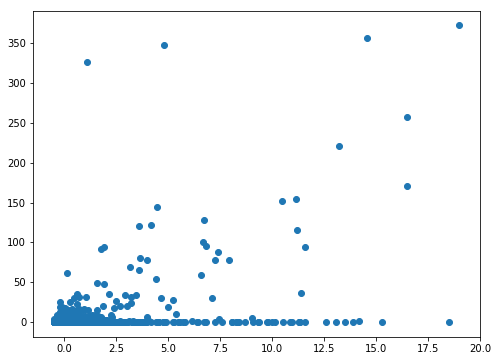

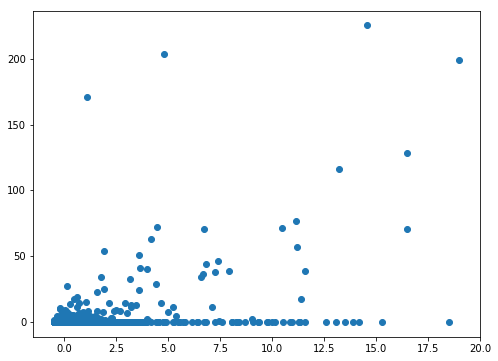

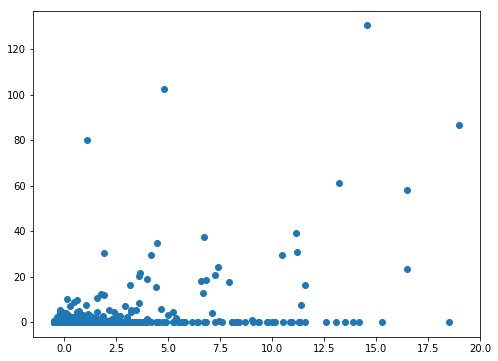

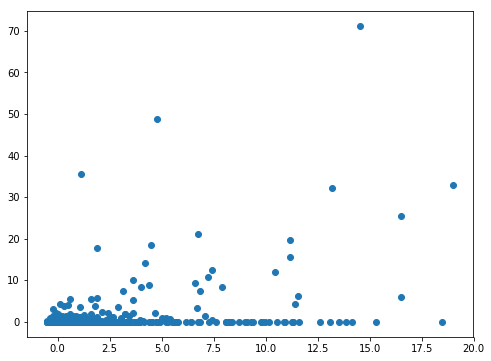

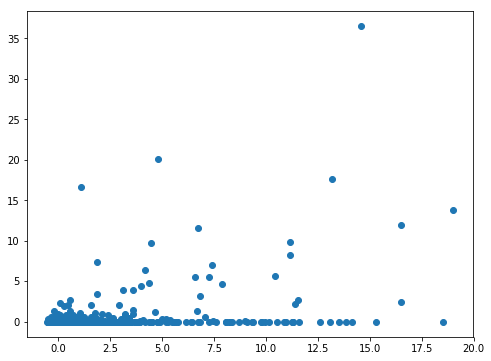

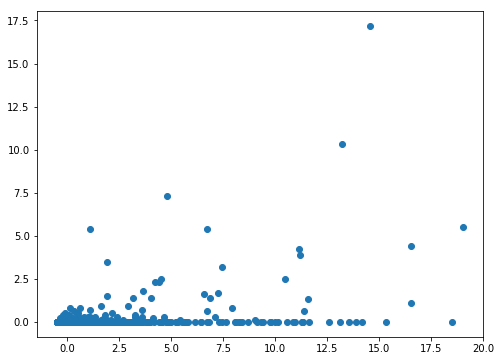

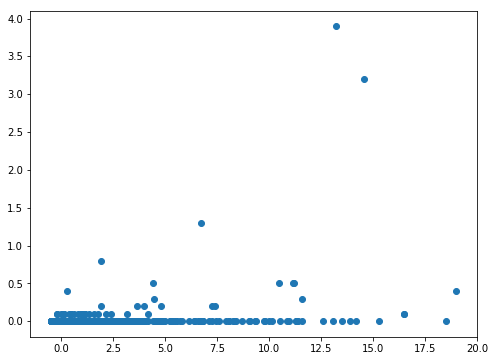

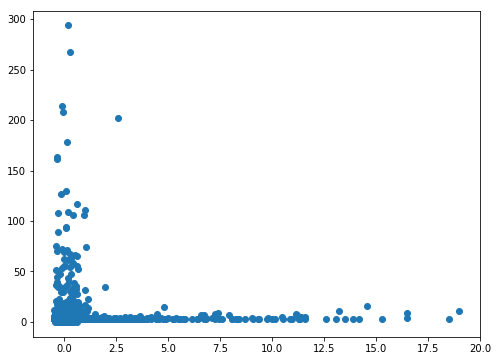

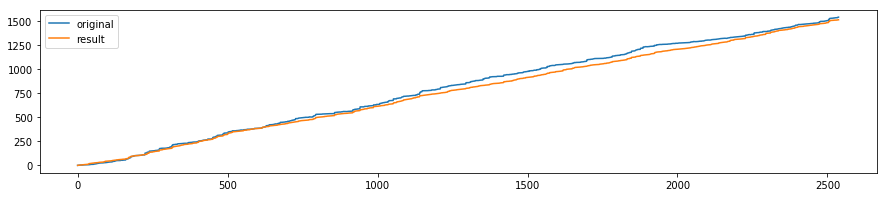

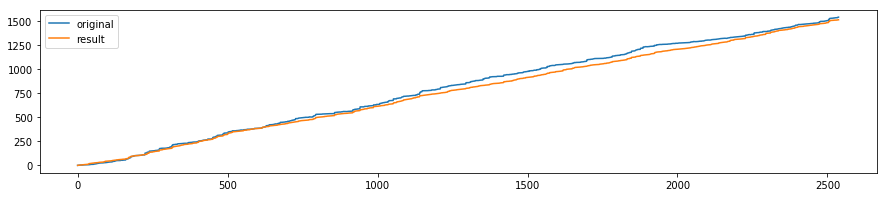

In [92]:
# Graphs of test data

yX_test = Graph(y_test,X_test)
yX_test.line_graph()
for i in range(len(X_cols)):
    yX_test.distribution_map(i)
yX_test.cumlate_graph()

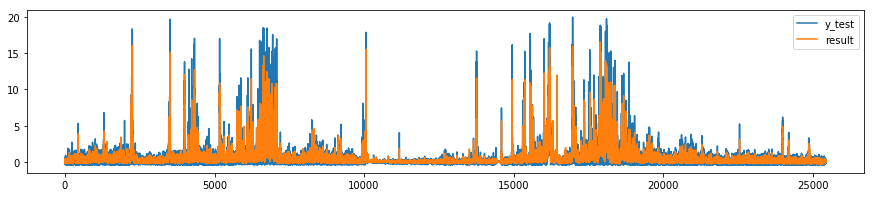

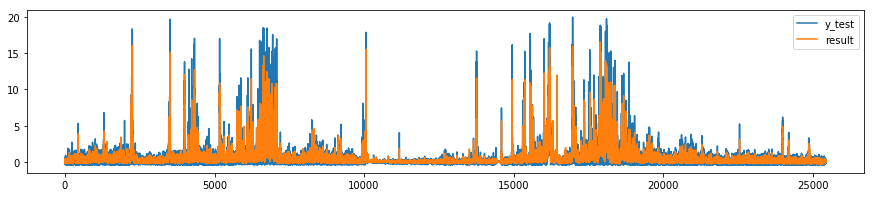

In [112]:
yX_all = Graph(y, X)
yX_all.line_graph()
# yX_all.cumlate_graph(90000,100000)
# for i in range(len(X_cols)):
#     yX_all.distribution_map(i)
#     print(X_cols[i])

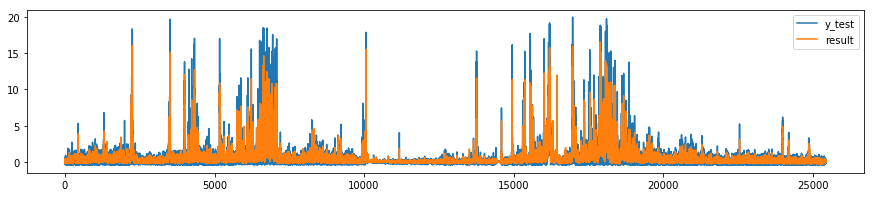

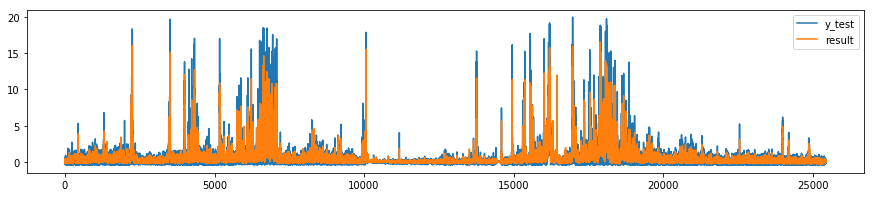

In [113]:
yX_all = Graph(y, X)
yX_all.line_graph()

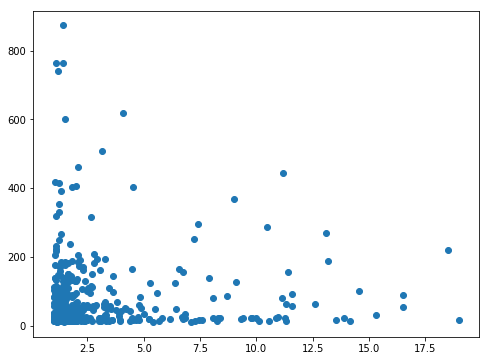

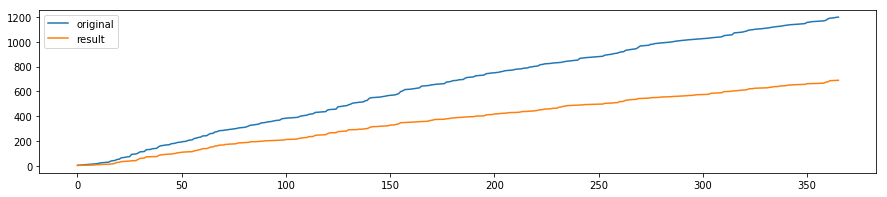

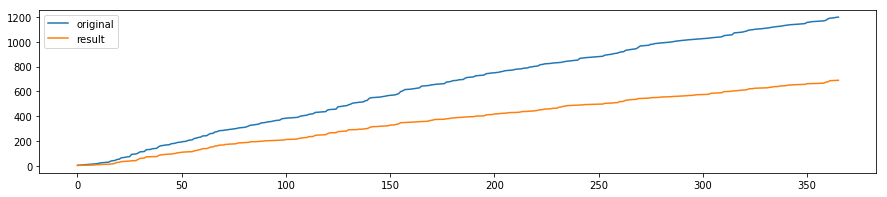

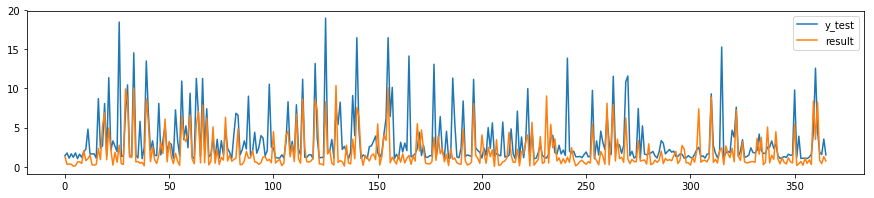

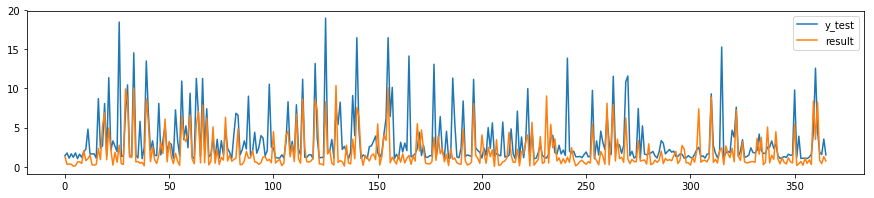

In [93]:
yX_test_del = Graph(y_test_del, X_test_del)
yX_test_del.distribution_map(3)
yX_test_del.cumlate_graph()
yX_test_del.line_graph()

In [117]:
df_ori = df_new[(df_new['hp_Tot(6)'] > -10)&(df_new['hp_Tot(6)'] < 500)]

X_ori = df_ori[X_cols].values.astype('float')
y_ori = df_ori[y_cols].values.astype('float')


yX_ori = Graph(y_ori, X_ori)
yX_ori.cumlate_graph()


KeyError: 'hp_Tot(6)'

1   VL_Tot(1)   0.07351818915219302
2   outC_Plate_Avg   0.040421352478327774
3   vel_P_Tot   0.03856865107236147
4   Velocity   0.036893453390788186
5   Plate_Tot(1)   0.033931611355988246
6   LC_Tot(5)   0.02900802622469245
7   LC_Tot(1)   0.028887338831826294
8   L_Tot(5)   0.024458017469389387
9   hp_Tot(1)   0.02401456664138344
10   VR_Tot(1)   0.020016974000159296
11   turb4000_Avg   0.01953133026626418
12   WL   0.017549851317638733
13   turb1000_Avg   0.017160466736418058
14   L_Tot(3)   0.016931342430212895
15   Bat_Avg   0.016930411484722897
16   outC_C_Avg   0.01652120874913247
17   DiffVolt_Avg   0.01623143256606403
18   VL_Tot(2)   0.01605890368286922
19   LC_Tot(4)   0.014429035472716628
20   WL_FMR_Avg   0.013903754469790667
21   LC_Tot(2)   0.013893475562711073
22   outC_VC_Avg   0.013853130006266994
23   hp_Tot(2)   0.012271399698787575
24   outC_LC_Avg   0.011678854432692686
25   LC_Tot(3)   0.011163286775719183
26   T75_Tot(5)   0.011012810753931125
27   outC_VL_Avg 

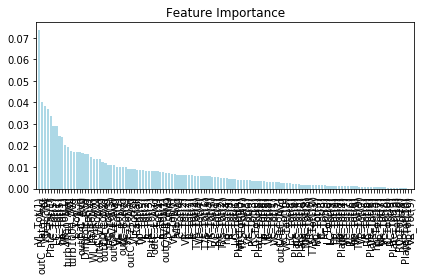

In [94]:
#
feature = model.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.loc[:, 'number']

#Name of the features
dfX = pd.DataFrame(X)
dfX.columns = X_cols
label = dfX.columns[0:]

#arrange the features in order of importance
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print( str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

          
import matplotlib
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(len(feature)),feature[indices], color='lightblue', align='center')
plt.xticks(range(len(feature)), label[indices], rotation=90)
plt.xlim([-1, len(feature)])
plt.tight_layout()
plt.show()

In [22]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *
# import graphviz

In [23]:
# from sklearn.datasets import *
# from sklearn import tree
# from dtreeviz.trees import *

# X_cols_np = np.array(X_cols)

# regr = tree.DecisionTreeRegressor(max_depth=10)
# regr.fit(X_train, y_train.ravel())

# viz = dtreeviz(regr,
#                X_train,
#                y_train.ravel(),
#                target_name="",
#                feature_names= X_cols_np
#               )

# #There's a UnicodeDecodeError problem if you try to visualize "viz",which is caused by the Japanese setting of this computer.
# #"viz.view()" works fine on Ubuntu in my Virtual machine.
# # viz.view()

In [24]:
# print(regr.score(X_test,y_test))